This Notebook serves to answer https://stackoverflow.com/questions/70875222/how-to-create-a-knowledge-graph-from-a-pandas-dataframe-using-rdflib-library-in

In [1]:
import time
print(time.ctime())
%load_ext ipydex.displaytools

Sat Jan 29 15:01:37 2022


In [2]:
import pandas as pd
from rdflib import Graph, URIRef, Namespace

d = {
    "source": pd.Series(["Edwin", "Reema", "Ron", "Tomorrow"]),
    "target": pd.Series(["football", "karate", "singer", "holiday"]),
    "edge": pd.Series(["plays", "plays", "is", "is"]),
}

df = pd.DataFrame(d) ##:

,source,target,edge
0,Edwin,football,plays
1,Reema,karate,plays
2,Ron,singer,is
3,Tomorrow,holiday,is


---

## Creating the graph

based on <https://stackoverflow.com/questions/43524943/creating-rdf-file-using-csv-file-as-input>

In [3]:
g = Graph()
n = Namespace('http://example.org/foo/')

for inded, row in df.iterrows():
    # add triple to rdf-graph
    g.add((URIRef(n+row["source"]), URIRef(n+row["edge"]), URIRef(n+row["target"])))

print(g.serialize(format='turtle'))

@prefix ns1: <http://example.org/foo/> .

ns1:Edwin ns1:plays ns1:football .

ns1:Reema ns1:plays ns1:karate .

ns1:Ron ns1:is ns1:singer .

ns1:Tomorrow ns1:is ns1:holiday .




## Visualization

based on https://stackoverflow.com/a/61483971/333403

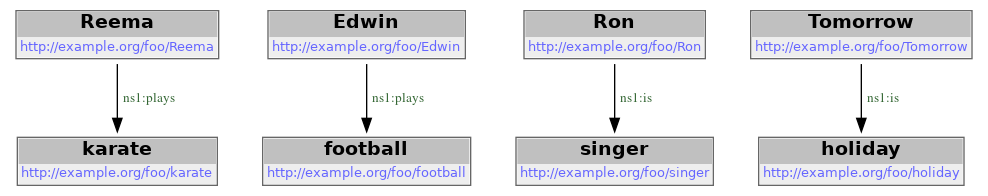

In [4]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(g)